In [11]:
import numpy as np
import matplotlib.pyplot as plt

def eta(u, T):
    return (u - T)*(u >= T) + (u + T)*(u <= -T)

In [12]:
num_iterations = 5
n = 200
N = 1024
k = 40
sigma = .05
s = 0.2
lambda_ = 0.1

In [13]:
A = np.sqrt(1/n)*np.random.randn(n, N)

x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
x[idx_nonzero_entries] = 1

#w = sigma*np.random.randn(n).reshape(-1, 1)

y = A @ x

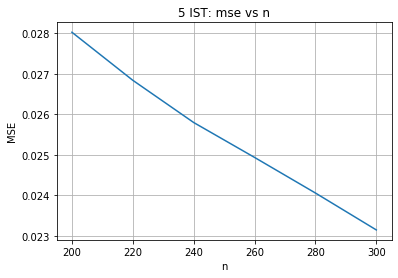

In [14]:
mse_vs_n = np.zeros(6)
n_vec = np.zeros(6)
cnt = 0
num_avg = 200
mse = 0

for loc_n in range(200, 320, 20):
    for run in range(num_avg):
        z = np.zeros(y.shape)
        xHt = np.zeros(x.shape)
        A = np.sqrt(1/loc_n)*np.random.randn(loc_n, N)
       # w = sigma*np.random.randn(loc_n).reshape(-1, 1)
        y = A @ x    
        for idx_iter in range(num_iterations):
            z = y - A @ xHt
            r = xHt + s * A.T @ z
            xHt = eta(r, s*lambda_)
        mse += (1/N) * np.sum((x - xHt)**2)
    mse_vs_n[cnt] = (1/num_avg) * mse
    n_vec[cnt] = loc_n
    cnt += 1
    mse = 0

# Plot results
plt.figure()
plt.plot(n_vec, mse_vs_n)
plt.xlabel('n')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title(f'{num_iterations} IST: mse vs n')
plt.show()